In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Imputing Values

In [7]:
df.isnull().sum()/ len(df) * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [8]:
#Different ways to impute values
print(df['age'].mean()) 
print(df['age'].mode()[0])
print(df['age'].median())

29.69911764705882
24.0
28.0


In [9]:
#removing deck column from the dataset because it has more than 70% missing values
#Inplace = True is used to update the dataset
df.drop('deck',axis=1,inplace=True)

In [10]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [11]:
#imputing values in age column by using mean of the column age
df['age'].fillna(df['age'].mean(),inplace = True)
#checking the change in the age column
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [12]:
#imputing embark and emabrked_town
df['embarked'].fillna(df['embarked'].mode()[0] , inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0] , inplace=True)

In [13]:
#checking changes again
df.isnull().sum() 

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

<Axes: >

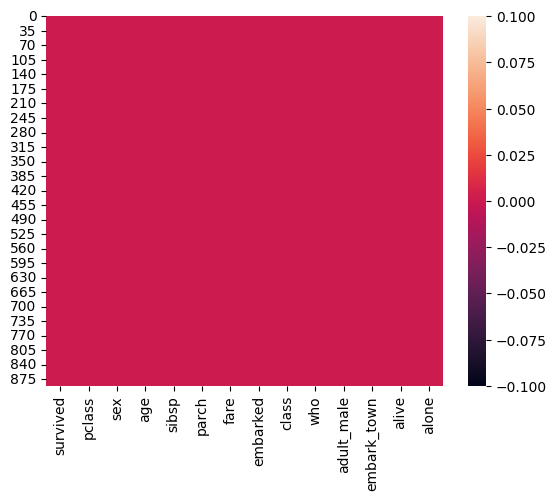

In [14]:
#checking through heatmap
sns.heatmap(df.isnull())

# Binning

In [15]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [16]:
#taking a look at age column
print(df['age'].min())
print(df['age'].max())

0.42
80.0


<Axes: xlabel='age', ylabel='Count'>

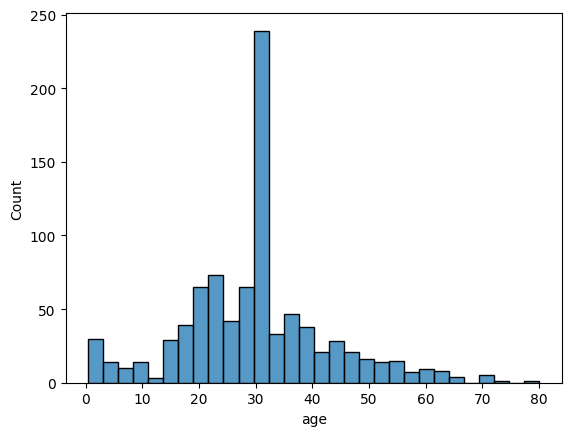

In [17]:
#checking with histogram plot
sns.histplot(df['age'])

### if histogram makes a bell shape then it means that data is equally distributed and is called Normal Distribution or Guassian Distribution

In [18]:
#Binning of age columns into 7 categories
bins = [0,1,5,12,18,30,50,80]
labels = ['Infants','Toddlers','Kids','Teens','Youngs','Middle Aged','Old']
#cutting aeg column to categories
pd.cut(df['age'], bins = bins , labels=labels)

0           Youngs
1      Middle Aged
2           Youngs
3      Middle Aged
4      Middle Aged
          ...     
886         Youngs
887         Youngs
888         Youngs
889         Youngs
890    Middle Aged
Name: age, Length: 891, dtype: category
Categories (7, object): ['Infants' < 'Toddlers' < 'Kids' < 'Teens' < 'Youngs' < 'Middle Aged' < 'Old']

# Feature Engineering

In [19]:
#adding this column in dataset based on age column

df['Binned_Age'] = pd.cut(df['age'], bins = bins , labels=labels)

In [20]:
#checking out the new column
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,Binned_Age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,Youngs
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,Middle Aged
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,Youngs
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,Middle Aged
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,Middle Aged


In [21]:
#checking values counts of new column

df['Binned_Age'].value_counts()

Binned_Age
Youngs         447
Middle Aged    241
Teens           70
Old             64
Toddlers        30
Kids            25
Infants         14
Name: count, dtype: int64

In [22]:
#renaming a column name

df.rename(columns={'Binned_Age':'Age_Groups'},inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,Age_Groups
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,Youngs
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,Middle Aged
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,Youngs
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,Middle Aged
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,Middle Aged


In [23]:
df.groupby('Age_Groups')['survived'].sum()

C:\Users\Hamad\AppData\Local\Temp\ipykernel_17184\1944639927.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age_Groups')['survived'].sum()


Age_Groups
Infants         12
Toddlers        19
Kids             9
Teens           30
Youngs         148
Middle Aged    102
Old             22
Name: survived, dtype: int64

# Data Filteration


In [24]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'Age_Groups'],
      dtype='object')

In [25]:
df2 = df[['survived','Age_Groups','class','fare']]

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   Age_Groups  891 non-null    category
 2   class       891 non-null    category
 3   fare        891 non-null    float64 
dtypes: category(2), float64(1), int64(1)
memory usage: 16.3 KB


In [27]:
df2['class'].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [30]:
#to check the data of only first class
df_first = df2[df2['class'] == 'First'] 
df_first['class'].value_counts()

class
First     216
Second      0
Third       0
Name: count, dtype: int64

In [29]:
#checking rowa who paid more than 200 fare

df_200 = df2[df2['fare'] > 200]
df_200['class'].value_counts()

class
First     20
Second     0
Third      0
Name: count, dtype: int64

In [ ]:
#Adding two filters

df3 = df2[(df['fare'] > 70) & (df['class'] == 'First')].sort_values(by='fare')

In [ ]:
df3['fare'].value_counts()

fare
263.0000    4
120.0000    4
90.0000     4
227.5250    4
79.2000     4
151.5500    4
110.8833    4
512.3292    3
153.4625    3
135.6333    3
86.5000     3
83.1583     3
113.2750    3
79.6500     3
211.3375    3
77.9583     3
76.7292     3
146.5208    2
247.5208    2
134.5000    2
133.6500    2
262.3750    2
164.8667    2
71.0000     2
108.9000    2
82.1708     2
77.2875     2
78.2667     2
78.8500     2
106.4250    2
80.0000     2
83.4750     2
89.1042     2
91.0792     2
93.5000     2
81.8583     1
211.5000    1
221.7792    1
71.2833     1
76.2917     1
75.2500     1
Name: count, dtype: int64